In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from PIL import Image


# Numpy Expand Dimension 

In [2]:
array = ([1, 2], [3, 4])
a_np_arr = np.array(array)

print(a_np_arr)
print(a_np_arr.shape)

b_minus_1 = np.expand_dims(a_np_arr, axis=-1)
print(b_minus_1)
print(b_minus_1.shape)

b_plus = np.expand_dims(a_np_arr, axis=1)
print(b_plus)
print(b_plus.shape)

b_zero = np.expand_dims(a_np_arr, axis=0)
print(b_zero)
print(b_zero.shape)

a = [5, 6, 7]
b = np.expand_dims(a, axis=-1)
print(b)



[[1 2]
 [3 4]]
(2, 2)
[[[1]
  [2]]

 [[3]
  [4]]]
(2, 2, 1)
[[[1 2]]

 [[3 4]]]
(2, 1, 2)
[[[1 2]
  [3 4]]]
(1, 2, 2)
[[5]
 [6]
 [7]]


# MNIST Classification

Keras, CNN Layers and Models assignment

In [3]:
keras = tf.keras
layers = keras.layers
models = keras.models

Train and Test Split from MNIST dataset

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [9]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [10]:
x_train = np.pad(x_train, ((0,0), (2,2), (2,2), (0,0)), mode='constant')
x_test = np.pad(x_test, ((0,0), (2,2), (2,2), (0,0)), mode='constant')

In [11]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 1)),

    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.AveragePooling2D((2, 2), strides=2),

    layers.Conv2D(15, (5, 5), activation='relu'),
    layers.AveragePooling2D((2, 2), strides=2),

    layers.Flatten(),
    
    layers.Dense(12, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8914 - loss: 0.3688 - val_accuracy: 0.9197 - val_loss: 0.2728
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9052 - loss: 0.3224 - val_accuracy: 0.9228 - val_loss: 0.2570
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9153 - loss: 0.2889 - val_accuracy: 0.9378 - val_loss: 0.2155
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9224 - loss: 0.2617 - val_accuracy: 0.9425 - val_loss: 0.1974
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9289 - loss: 0.2402 - val_accuracy: 0.9440 - val_loss: 0.1868
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9334 - loss: 0.2248 - val_accuracy: 0.9497 - val_loss: 0.1700
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9369 - loss: 0.2118 - val_accuracy: 0.9510 - val_loss: 0.1632
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9406 - loss: 0.1998 - val_accur

In [16]:
accuracy_test, loss_test = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy after 10 Epochs : {accuracy_test}')
print(f'Loss after 10 Epochs : {loss_test}')

Accuracy after 10 Epochs : 0.15618392825126648
Loss after 10 Epochs : 0.9527000188827515


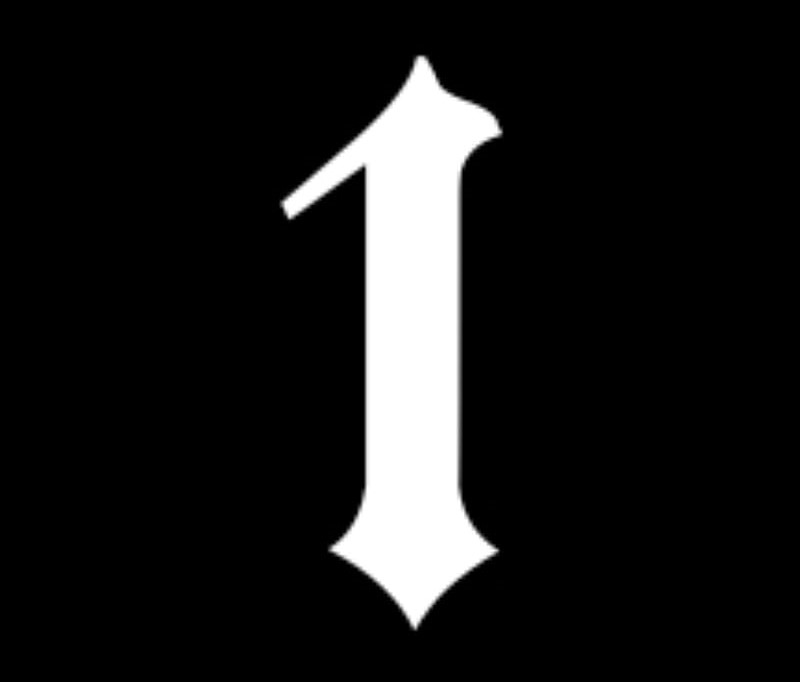

In [39]:
img_path = 'test_one.jpg'
img_open = Image.open(img_path).convert('L')
img_open

In [40]:
img_open = img_open.resize((28, 28))
img_open

In [41]:
x_img = np.array(img_open).astype('float32') / 255.0
x_img = np.expand_dims(x_img, axis=-1)
x_img = np.pad(x_img, ((2,2), (2,2), (0,0)), mode='constant')
x_img = np.expand_dims(x_img, axis=0)

In [42]:
predict_proba = model.predict(x_img, verbose=0)
predict = int(np.argmax(predict_proba, axis=1)[0])
confidence = float(np.max(predict_proba))

print(predict_proba)
print(confidence)
print(predict)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
1


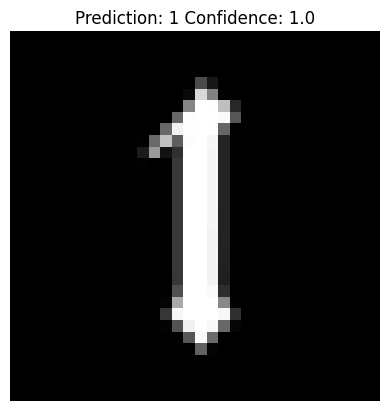

In [51]:
plt.imshow(x_img[0,:,:,0], cmap="gray")
plt.title(f"Prediction: {predict} Confidence: {confidence}")
plt.axis("off")
plt.show()